In [2]:
# Import burst detection functions
from neurodsp.burst import detect_bursts_dual_threshold, compute_burst_stats

# Import simulation code for creating test data
from neurodsp.sim import sim_combined
from neurodsp.utils import set_random_seed, create_times

# Import utilities for loading and plotting data
from neurodsp.utils.download import load_ndsp_data
from neurodsp.plts.time_series import plot_time_series, plot_bursts


In [3]:
# Set the random seed, for consistency simulating data
set_random_seed(0)


In [4]:
# Simulation settings
fs = 1000
n_seconds = 5

# Define simulation components
components = {'sim_synaptic_current': {'n_neurons': 1000, 'firing_rate': 2,
                                       't_ker': 1.0, 'tau_r': 0.002, 'tau_d': 0.02},
              'sim_bursty_oscillation': {'freq': 10, 'enter_burst': .2, 'leave_burst': .2}}

# Simulate a signal with a bursty oscillation with an aperiodic component & a time vector
sig = sim_combined(n_seconds, fs, components)
times = create_times(n_seconds, fs)


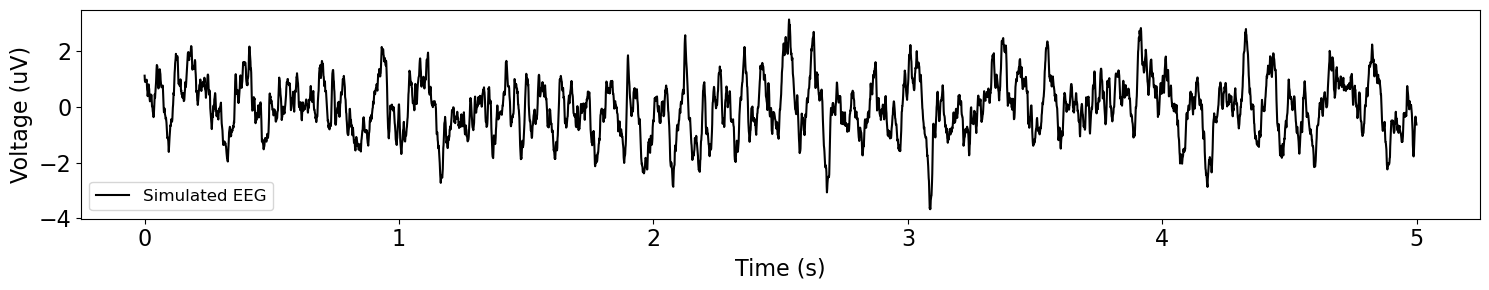

In [5]:
# Plot the simulated data
plot_time_series(times, sig, 'Simulated EEG')


In [6]:
# Settings for the dual threshold algorithm
amp_dual_thresh = (1, 2)
f_range = (8, 12)

# Detect bursts using dual threshold algorithm
bursting = detect_bursts_dual_threshold(sig, fs, amp_dual_thresh, f_range)


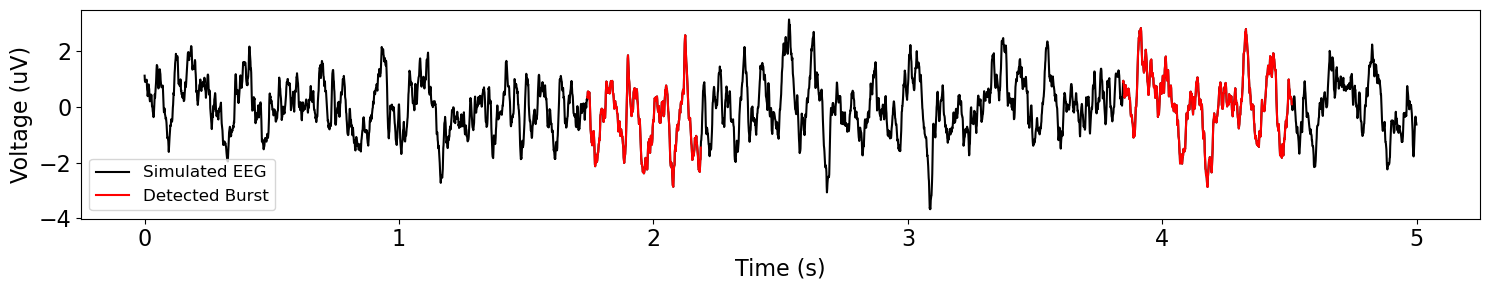

In [7]:
# Plot original signal and burst activity
plot_bursts(times, sig, bursting, labels=['Simulated EEG', 'Detected Burst'])


In [8]:
# Compute burst statistics
burst_stats = compute_burst_stats(bursting, fs)

# Print out burst statistic information
for key, val in burst_stats.items():
    print('{:15} \t: {}'.format(key, val))


n_bursts        	: 2
duration_mean   	: 0.5555
duration_std    	: 0.10850000000000001
percent_burst   	: 22.22
bursts_per_second 	: 0.4


In [9]:
# Download, if needed, and load example data file
sig = load_ndsp_data('sample_data_1.npy', folder='data')

# Set sampling rate, and create a times vector for plotting
fs = 1000
times = create_times(len(sig)/fs, fs)


In [10]:
# Set the frequency range to look for bursts
f_range = (8, 12)

# Detect bursts using the dual threshold algorithm
bursting = detect_bursts_dual_threshold(sig, fs, (3, 3), f_range)


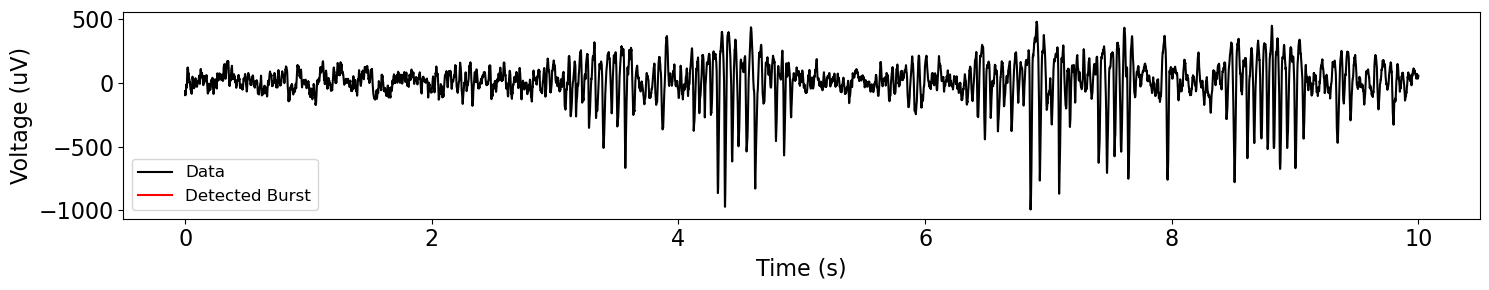

In [11]:
# Plot original signal and burst activity
plot_bursts(times, sig, bursting, labels=['Data', 'Detected Burst'])


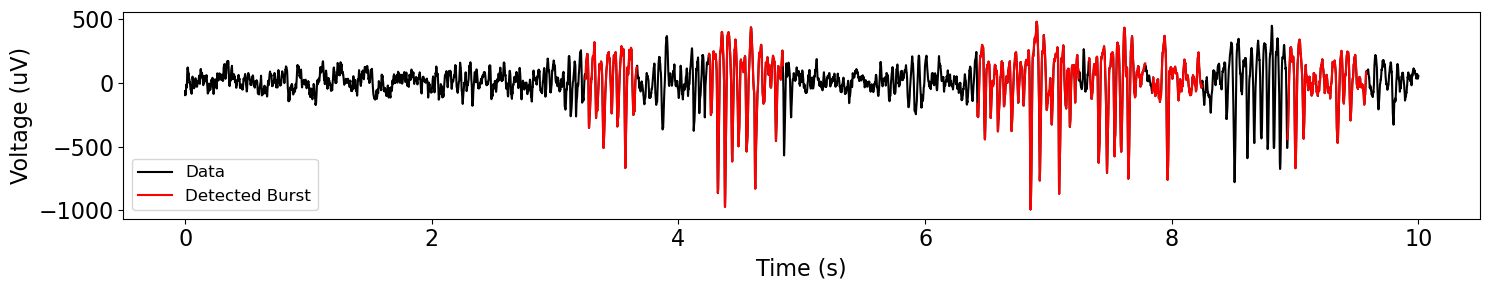

In [12]:
# Detect bursts using dual threshold algorithm
bursting = detect_bursts_dual_threshold(sig, fs, (1, 2), f_range)

# Plot original signal and burst activity
plot_bursts(times, sig, bursting, labels=['Data', 'Detected Burst'])


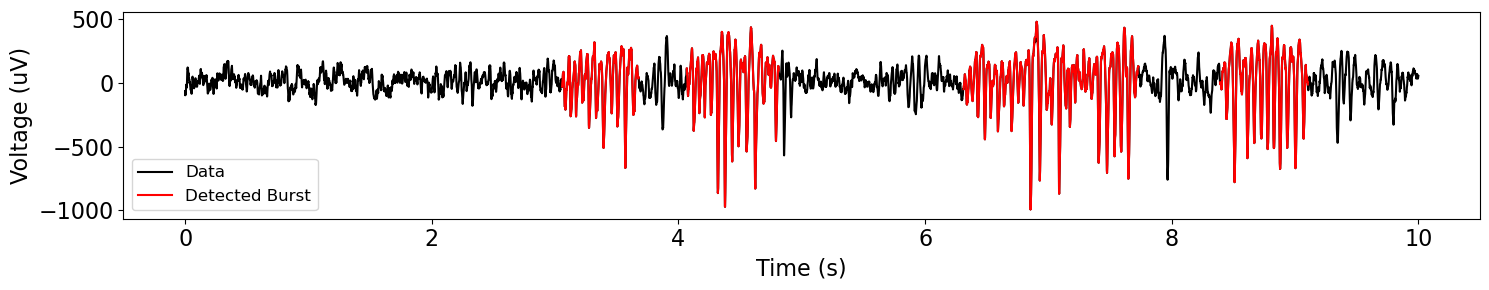

In [13]:
# Detect bursts
bursting = detect_bursts_dual_threshold(sig, fs, (1, 2), (13, 30))

# Plot original signal and burst activity
plot_bursts(times, sig, bursting, labels=['Data', 'Detected Burst'])


In [14]:
# Compute burst statistics
burst_stats = compute_burst_stats(bursting, fs)

# Print out burst statistic information
for key, val in burst_stats.items():
    print('{:15} \t: {}'.format(key, val))


n_bursts        	: 5
duration_mean   	: 0.6981999999999999
duration_std    	: 0.09064524256683304
percent_burst   	: 34.91
bursts_per_second 	: 0.5
